In [17]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import joblib
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.simplefilter("ignore", category=ConvergenceWarning)

from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time


wine = pd.read_csv(r"C:\Users\tkste\Downloads\winequality-red-properformat.csv")

In [18]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [19]:
# No null values are present, good
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [20]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
# normalizing data

wine_norm = StandardScaler().fit_transform(wine)
wine_norm = pd.DataFrame(wine_norm)
wine_norm.columns = wine.columns

wine_norm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,-0.382271,0.053845,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.787823
1595,-1.390155,0.123905,-0.877968,-0.240375,-0.541259,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,0.450848
1596,-1.160343,-0.099554,-0.723916,-0.169427,-0.243707,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,0.450848
1597,-1.390155,0.654620,-0.775267,-0.382271,-0.264960,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.787823


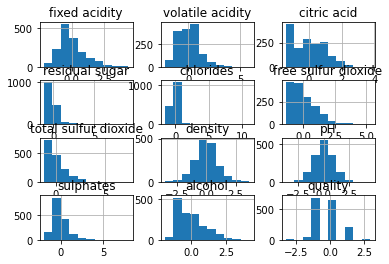

In [22]:
# histograms
wine_norm.hist()
plt.show()

# for residual sugar and chlorides we may need to take the log of the variable because of the distribution

In [23]:
wine_log = wine
wine_log['residual sugar_log'] = np.log(wine_log['residual sugar'])
wine_log['chlorides_log'] = np.log(wine_log['chlorides'])
wine_log.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,residual sugar_log,chlorides_log
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023,0.850232,-2.505462
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569,0.357443,0.327215
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,-0.105361,-4.422849
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000,0.641854,-2.659260
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000,0.788457,-2.538307
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000,0.955511,-2.407946
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,2.740840,-0.492658


In [24]:
# normalizing data
# we will not normlaize the y variable since it is difficult to have data type float for a classification problem
X = wine_log.drop(columns = ['quality','residual sugar', 'chlorides']) # x variables
Y = wine_log['quality'] # y variable

X_norm = StandardScaler().fit_transform(X)
X_norm = pd.DataFrame(X_norm)
X_norm.columns = X.columns

X_norm

,fixed acidity,volatile acidity,citric acid,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,residual sugar_log,chlorides_log
0,-0.528360,0.961877,-1.391472,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.583150,-0.218763
1,-0.298547,1.967442,-1.391472,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,0.294627,0.558443
2,-0.298547,1.297065,-1.186070,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.048478,0.365302
3,1.654856,-1.384443,1.484154,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,-0.583150,-0.259254
4,-0.528360,0.961877,-1.391472,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.583150,-0.218763
...,...,...,...,...,...,...,...,...,...,...,...
1594,-1.217796,0.403229,-0.980669,1.542054,-0.075043,-0.978765,0.899886,-0.461180,0.072294,-0.439605,0.298111
1595,-1.390155,0.123905,-0.877968,2.211469,0.137820,-0.862162,1.353436,0.601055,0.729364,-0.172877,-0.841175
1596,-1.160343,-0.099554,-0.723916,1.255161,-0.196679,-0.533554,0.705508,0.542042,0.541630,-0.048478,-0.218763
1597,-1.390155,0.654620,-0.775267,1.542054,-0.075043,-0.676657,1.677400,0.305990,-0.209308,-0.439605,-0.259254


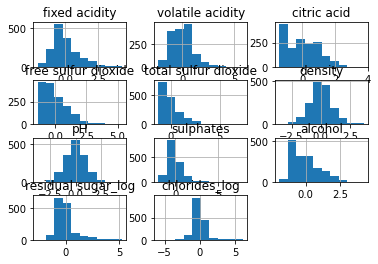

In [25]:
X_norm.hist()
plt.show()

# the logged variables make the distribution more normal which is good

In [26]:
# Splitting the data into training, validation, and test groups

X_train, X_test, y_train, y_test = train_test_split(X_norm, Y, test_size = 0.4, random_state = 42)
# To make the cross validation set, we will split this test set again
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size = 0.5, random_state = 42)

# Ensuring the split is 60%, 20%, 20%
for dataset in [y_train, y_val, y_test]:
    print(round(len(dataset) / len(Y), 2))

0.6
0.2
0.2


In [27]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [28]:
mlp = MLPClassifier()
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],# leaving after the comma blank implies one layer. so 10 nodes with one layer, 50 nodes with one yaer and 100 nodes with one layer are tested here
    'activation': ['relu', 'tanh'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']# invscaling decreses the learning rate over time so it goes slower as we hopefully get closer to the minimum. adaptive keeps the elarning rate constant as long as it is still going down. once the loss funciton starts increasing, it decreases the learning rate.
}

mlp_cv = GridSearchCV(mlp, parameters, cv = 5)
mlp_cv.fit(X_train, y_train.values.ravel())

print_results(mlp_cv)

BEST PARAMS: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}

0.602 (+/-0.074) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'constant'}
0.6 (+/-0.088) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'invscaling'}
0.601 (+/-0.035) for {'activation': 'relu', 'hidden_layer_sizes': (10,), 'learning_rate': 'adaptive'}
0.615 (+/-0.06) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant'}
0.613 (+/-0.079) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}
0.612 (+/-0.061) for {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive'}
0.616 (+/-0.057) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant'}
0.623 (+/-0.083) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'invscaling'}
0.62 (+/-0.053) for {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learnin

In [29]:
joblib.dump(mlp_cv.best_estimator_, r"C:\Users\tkste\Downloads\Pickle_Folder\Wine_MLP.pkl")

['C:\\Users\\tkste\\Downloads\\Pickle_Folder\\Wine_MLP.pkl']

In [30]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]# the none lets the random forest go as deep as it wants before it hits an error with random forest classifier
}

rf_cv = GridSearchCV(rf, parameters, cv = 5)
rf_cv.fit(X_train, y_train.values.ravel())

print_results(rf_cv)

BEST PARAMS: {'max_depth': 32, 'n_estimators': 250}

0.569 (+/-0.04) for {'max_depth': 2, 'n_estimators': 5}
0.596 (+/-0.063) for {'max_depth': 2, 'n_estimators': 50}
0.596 (+/-0.058) for {'max_depth': 2, 'n_estimators': 250}
0.606 (+/-0.058) for {'max_depth': 4, 'n_estimators': 5}
0.607 (+/-0.047) for {'max_depth': 4, 'n_estimators': 50}
0.622 (+/-0.043) for {'max_depth': 4, 'n_estimators': 250}
0.6 (+/-0.078) for {'max_depth': 8, 'n_estimators': 5}
0.644 (+/-0.064) for {'max_depth': 8, 'n_estimators': 50}
0.648 (+/-0.06) for {'max_depth': 8, 'n_estimators': 250}
0.602 (+/-0.034) for {'max_depth': 16, 'n_estimators': 5}
0.665 (+/-0.051) for {'max_depth': 16, 'n_estimators': 50}
0.663 (+/-0.051) for {'max_depth': 16, 'n_estimators': 250}
0.615 (+/-0.084) for {'max_depth': 32, 'n_estimators': 5}
0.669 (+/-0.075) for {'max_depth': 32, 'n_estimators': 50}
0.671 (+/-0.059) for {'max_depth': 32, 'n_estimators': 250}
0.61 (+/-0.063) for {'max_depth': None, 'n_estimators': 5}
0.65 (+/-0.052) 

In [31]:
joblib.dump(rf_cv.best_estimator_, r"C:\Users\tkste\Downloads\Pickle_Folder\Wine_RF.pkl")

['C:\\Users\\tkste\\Downloads\\Pickle_Folder\\Wine_RF.pkl']

In [33]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],# note that we are having shallower but possibly mroe decision trees than random forests
    'learning_rate': [0.1, 1, 2]
}

gb_cv = GridSearchCV(gb, parameters, cv = 5)
gb_cv.fit(X_train, y_train.values.ravel())

print_results(gb_cv)
# Avoid rerunning, takes about 15min

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 500}

0.566 (+/-0.045) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 5}
0.606 (+/-0.083) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
0.609 (+/-0.068) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 250}
0.606 (+/-0.065) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}
0.595 (+/-0.055) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 5}
0.631 (+/-0.045) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50}
0.637 (+/-0.053) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 250}
0.634 (+/-0.055) for {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}
0.61 (+/-0.084) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 5}
0.654 (+/-0.043) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
0.644 (+/-0.042) for {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 250}
0.644 (+/-0.044) for {'learning_rate': 0.1, '

In [34]:
joblib.dump(gb_cv.best_estimator_, r"C:\Users\tkste\Downloads\Pickle_Folder\Wine_GB.pkl")

['C:\\Users\\tkste\\Downloads\\Pickle_Folder\\Wine_GB.pkl']

In [35]:
# Reading in models
models = {}

for mdl in ['MLP', 'RF', 'GB']:
    models[mdl] = joblib.load(r"C:\Users\tkste\Downloads\Pickle_Folder\Wine_{}.pkl".format(mdl))

In [39]:
# Evaluate models on validation set
def evaluate_model(name, model, features, labels): # features and labels are validation or test set features or labels
    start = time()
    pred = model.predict(features) # array of predictions
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred, average = 'micro'), 3)
    recall = round(recall_score(labels, pred, average = 'micro'), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [40]:
for name, mdl in models.items():
    evaluate_model(name, mdl, X_val, y_val)
    # since averge = 'micro' we receive the same score for all of them

MLP -- Accuracy: 0.619 / Precision: 0.619 / Recall: 0.619 / Latency: 5.7ms
RF -- Accuracy: 0.675 / Precision: 0.675 / Recall: 0.675 / Latency: 29.0ms
GB -- Accuracy: 0.634 / Precision: 0.634 / Recall: 0.634 / Latency: 59.6ms


In [41]:
# Evaluating best model on test set
# Best model is random forest

evaluate_model('Random Forest', models['RF'], X_test, y_test)

Random Forest -- Accuracy: 0.644 / Precision: 0.644 / Recall: 0.644 / Latency: 45.6ms
